## Определение перспективного тарифа для оператора мобильной связи

### Описание проекта
Оператору мобильной связи необходимо определить какой из новых тарифов следует выпустить на рынок исходя из их прибыльности.
Для проведения анализа были собраны данные на тестовой группе пользователей, а именно: название тарифа, продолжительность звонков, количество сообщений и объём Интернет-трафика за прошедшие 12 месяцев.

### Описание тарифов
#### Тариф "Среднячок"  (middle)
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

#### Тариф "Дико-дорог"  (wild_expensive)
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

### Шаг 1. Подготовка к работе, открытие исходных данных

#### 1.1. Импорт библиотек

In [1]:
# Импорт используемых в проекте библиотек

import math
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.2. Описание используемых в проекте глобальных переменных и констант

In [2]:
# Константы используемые в проекте

FIGSIZE_1 = (16, 8)    # Размер графиков в атрибуте figsize

#### 1.3. Описание используемых в проекте функций

In [3]:
# Описание используемых в проекте функций

# Функция для округления в большую сторону значения столбца и преобразованием типа в int
def ceil_round_fun(row):
    if row > 0:
        return int(math.ceil(row))
    return 0


# Функция для подсчёта помесячной выручки каждого абонента
def profit_calc_fun(row):
    # Задание входных переменных:
    tariff = row['tariff']
    minutes = row['duration']
    messages = row['messages']
    mb_used = row['mb_used']

    # Заполнение переменных для расчёта выручки в зависимости от тарифа
    if tariff == 'middle':
        m = 0
    else:
        m = 1
    tariff_month = df_tariffs.loc[m, 'rub_monthly_fee']
    tariff_minutes = df_tariffs.loc[m, 'rub_per_minute']
    tariff_messages = df_tariffs.loc[m, 'rub_per_message']
    tariff_gb = df_tariffs.loc[m, 'rub_per_gb']
    free_minutes = df_tariffs.loc[m, 'minutes_included']
    free_messages = df_tariffs.loc[m, 'messages_included']
    free_mb = df_tariffs.loc[m, 'mb_per_month_included']

    # Расчёт выручки от звонков
    profit_minutes = minutes - free_minutes
    if profit_minutes <= 0:
        profit_minutes = 0
    else:
        profit_minutes = profit_minutes * tariff_minutes

    # Расчёт выручки от сообщений
    profit_messages = messages - free_messages
    if profit_messages <= 0:
        profit_messages = 0
    else:
        profit_messages = profit_messages * tariff_messages

    # Расчёт выручки от интернет-трафика
    profit_internet = mb_used - free_mb 
    if profit_internet <= 0:
        profit_internet = 0
    else:    
        profit_internet = math.ceil(profit_internet / 1024) * tariff_gb

    # Итого суммарная выручка за месяц:    
    profit = tariff_month + profit_minutes + profit_messages + profit_internet
    return profit
      
    
# Функция для отображения основных параметров столбца и построения его гистрограммы и ящика с усами
# https://stackoverflow.com/questions/33381330/histogram-with-boxplot-above-in-python
def histogram_boxplot(data, xlabel = None, title = None, font_scale=1.5, figsize=FIGSIZE_1, bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    print('Основные данные для столбца:',data.name, '-', title)
    print(data.describe())
    print()
    
    variance = np.var(data)   # Расчет дисперсии с помощью функции var() из библиотеки numpy
    standard_deviation = np.std(data)  # Расчет стандартного отклонения с помощью функции std() из библиотеки numpy
    mean_value = data.mean()  # Расчет среднего значения с помощью метода mean() из библиотеки pandas
    
    print('Дисперсия: {:.2f}'.format(variance))
    print('Стандартное отклонение: {:.2f}'.format(standard_deviation))
    print('Среднее значение: {:.2f}'.format(mean_value))
    print()
    
    sns.set(font_scale=font_scale)
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    sns.boxplot(data, ax=ax_box2)
    sns.distplot(data, ax=ax_hist2, bins=bins) if bins else sns.distplot(data, ax=ax_hist2)
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title)
    plt.show()


#### 1.4. Открытие исходных таблиц

In [10]:
# Открытие исходных файлов с данными

# Применение функции pd.read_csv, первый аргумент - путь к файлу, второй аргумент - знак разделителя столбцов
df_calls = pd.read_csv('datasets/calls.csv', sep=',')
df_internet = pd.read_csv('datasets/internet.csv', sep=',')
df_messages = pd.read_csv('datasets/messages.csv', sep=',')
df_tariffs = pd.read_csv('datasets/tariffs.csv', sep=',')
df_users = pd.read_csv('datasets/users.csv', sep=',')

#### 1.5. Изучение исходных таблиц

In [5]:
# Просмотр исходных таблиц и общей информации о них

# Вывод на экран исходной таблицы функцией display() и просмотр общей информации методом info()

# Таблица df_calls - продолжительность звонков
display(df_calls)
df_calls.info()
print()
print('Количество пользователей в таблице calls:', len(df_calls['user_id'].unique()))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

Количество пользователей в таблице calls: 492


In [8]:
# Таблица df_internet - объём интернет-трафика за сессию
display(df_internet)
df_internet.info()
print()
print('Количество пользователей в таблице internet:', len(df_internet['user_id'].unique()))

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

Количество пользователей в таблице internet: 497


In [6]:
# Таблица df_messages - даты отправки смс-сообщений
display(df_messages)
df_messages.info()
print()
print('Количество пользователей в таблице messages:', len(df_messages['user_id'].unique()))

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB

Количество пользователей в таблице messages: 426


In [12]:
# Таблица df_tariffs - стоимость услуг по двум тарифам
display(df_tariffs)
df_tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,middle
1,1000,30720,3000,1950,150,1,1,wild_expensive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [13]:
# Таблица df_users - данные пользователей двух тарифов
display(df_users.head())
df_users.info()
print()
print('Количество пользователей в таблице users:', len(df_users['user_id'].unique()))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,wild_expensive
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,middle
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,middle
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,wild_expensive
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,wild_expensive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Количество пользователей в таблице users: 500


### Выводы по шагу 1.
1. Столбец **call_date** в таблице **calls**, столбец **session_date** в таблице **internet**, столбец **message_date** в таблице **messages**, столбцы **churn_date** и **reg_date** в таблице **users** имеют ***строковый тип данных***, но содержат значения даты, следовательно, их следует преобразовать в тип данных ***datetime***.
1. В таблице **calls** 202607 строк и ни одного пропуска (NaN).
1. В таблице **internet** 149396 строк и ни одного пропуска (NaN), но есть лишний столбец **Unnamed: 0** который дублирует индексы таблицы, его следует удалить
1. В таблице **messages** 123036 cтрок и ни одного пропуска (NaN).
1. В таблице **users** в столбце **churn_date** 38 ненулевых значений, а остальные - пропущены, но это хорошо поскольку по условиям задачи если значение пропущено, то тариф ещё действовал на момент выгрузки данных.
1. В таблице **tariffs** значения соответствуют описанию, типы данных верные.
1. Количество уникальных пользователей в таблицах **calls, internet** и **messages**, отличается от значения 500 в таблице **users**. По всей видимости не все пользователи в данной выборке совершали звонки (492 чел.), писали смс (426 чел.) и сёрфили Интернет (497 чел.). Это приводит к тому, что результирующие датафреймы будут разных размеров.

### Шаг 2. Подготовка данных

#### 2.1. Удаление лишнего столбца в таблице "df_internet"

In [18]:
# Удаление лишнего столбца в таблице df_internet с помощью метода drop()

df_internet.drop(['Unnamed: 0'], axis='columns', inplace=True)
display(df_internet.head())

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


#### 2.2. Приведение значений даты в столбце "call_date" в таблице "calls" к типу *datetime*

In [19]:
# Приведение значений даты к типу datetime методом pd.to_datetime с указанием требуемого формата
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
print(df_calls['call_date'].head())

0   2018-07-25
1   2018-08-17
2   2018-06-11
3   2018-09-21
4   2018-12-15
Name: call_date, dtype: datetime64[ns]


#### 2.3. Приведение значений даты в столбце "session_date" в таблице "internet" к типу *datetime*

In [20]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
print(df_internet['session_date'].head())

0   2018-11-25
1   2018-09-07
2   2018-06-25
3   2018-08-22
4   2018-09-24
Name: session_date, dtype: datetime64[ns]


#### 2.4. Приведение значений даты в столбце "message_date" в таблице "messages" к типу *datetime*

In [21]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
print(df_messages['message_date'].head())

0   2018-06-27
1   2018-10-08
2   2018-08-04
3   2018-06-16
4   2018-12-05
Name: message_date, dtype: datetime64[ns]


#### 2.5. Приведение значений даты в столбце "churn_date" в таблице "users" к типу *datetime*

In [22]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
print(df_users['churn_date'].tail())

495          NaT
496          NaT
497          NaT
498   2018-10-25
499          NaT
Name: churn_date, dtype: datetime64[ns]


#### 2.6. Приведение значений даты в столбце "reg_date" в таблице "users" к типу *datetime*

In [23]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
print(df_users['reg_date'].head())

0   2018-05-25
1   2018-11-01
2   2018-06-17
3   2018-08-17
4   2018-05-14
Name: reg_date, dtype: datetime64[ns]


#### 2.7. Определение количества записей с продолжительностью звонка равной нулю

In [24]:
display(df_calls.query('duration == 0.0'))
print('Количество записей с продолжительностью звонка равной нулю составляет {:.1%}'.format(
    df_calls.query('duration == 0.0').shape[0] / df_calls.shape[0]))

,id,call_date,duration,user_id,duration_rounded
0,1000_0,2018-07-25,0.0,1000,0
1,1000_1,2018-08-17,0.0,1000,0
5,1000_5,2018-11-02,0.0,1000,0
6,1000_6,2018-10-18,0.0,1000,0
9,1000_9,2018-08-15,0.0,1000,0
...,...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499,0
202592,1499_205,2018-10-13,0.0,1499,0
202593,1499_206,2018-12-26,0.0,1499,0
202594,1499_207,2018-10-28,0.0,1499,0


Количество записей с продолжительностью звонка равной нулю составляет 19.6%


#### 2.8. Исследование аномалии нулевой продолжительности звонков

In [25]:
display(df_calls.query('duration == 0.01'))
display(df_calls.query('duration > 0 and duration < 0.01'))

,id,call_date,duration,user_id,duration_rounded
453,1001_85,2018-12-12,0.01,1001,1
1824,1005_421,2018-08-03,0.01,1005,1
5333,1015_53,2018-09-10,0.01,1015,1
10569,1027_439,2018-09-14,0.01,1027,1
10649,1027_519,2018-09-02,0.01,1027,1
...,...,...,...,...,...
198522,1487_109,2018-11-11,0.01,1487,1
198643,1488_105,2018-11-09,0.01,1488,1
199752,1492_63,2018-10-18,0.01,1492,1
199992,1492_303,2018-11-01,0.01,1492,1


,id,call_date,duration,user_id,duration_rounded


- Поскольку выяснить истинную природу звонков с нулевой продолжительностью возможности нет, то следует сделать предположение как они могли появится. По выборкам видно, что в таблице есть звонки с продолжительностью равной 0.01 секунды, но нет записей с продолжительностью в интервале больше нуля и меньше 0.01 секунды. Соответственно, нулевыми звонками могли стать все звонки длительностью меньше 0.01 секунды.
- По условиям задачи звонки с нулевой продолжительностью не тарифицируются - пользователи за них не платят.
- Звонки с нулевой продолжительностью не повлияют на расчёт выручки, но будут учтены в общей статистике и при подсчёте количества звонков по каждому пользователю.

#### 2.9. Добавление столбца с округлённым вверх значением продолжительности звонка

In [26]:
# Применение написанной функции для получения столбца с округлёнными в большую сторону значениями продолжительности звонка       
df_calls['duration_rounded'] = df_calls['duration'].apply(ceil_round_fun)
display(df_calls.head())

,id,call_date,duration,user_id,duration_rounded
0,1000_0,2018-07-25,0.00,1000,0
1,1000_1,2018-08-17,0.00,1000,0
2,1000_2,2018-06-11,2.85,1000,3
3,1000_3,2018-09-21,13.80,1000,14
4,1000_4,2018-12-15,5.18,1000,6


#### 2.10. Добавление столбца с номером месяца совершения звонка

In [27]:
# Определение месяца с помощью обращения к атрибуту dt.month
df_calls['month'] = df_calls['call_date'].dt.month
display(df_calls.head())

,id,call_date,duration,user_id,duration_rounded,month
0,1000_0,2018-07-25,0.00,1000,0,7
1,1000_1,2018-08-17,0.00,1000,0,8
2,1000_2,2018-06-11,2.85,1000,3,6
3,1000_3,2018-09-21,13.80,1000,14,9
4,1000_4,2018-12-15,5.18,1000,6,12


#### 2.11. Определение количества сделанных звонков и израсходованных минут разговора по месяцам

In [28]:
# Получение количества сделанных звонков и израсходованных минут по месяцам методом pivot_table() 
pivot_calls = df_calls.pivot_table(index=['user_id', 'month'], values='duration_rounded', aggfunc=['count', 'sum'])
pivot_calls.set_axis(['calls', 'duration'], axis = 'columns', inplace = True)
display(pivot_calls)

calls  duration
user_id month                 
1000    5         22       159
        6         43       172
        7         47       340
        8         52       408
        9         58       466
...              ...       ...
1498    10        41       247
1499    9          9        70
        10        68       449
        11        74       612
        12        69       492

[3174 rows x 2 columns]

#### 2.12. Добавление столбца с номером месяца отправки сообщения

In [29]:
df_messages['month'] = df_messages['message_date'].dt.month
display(df_messages.head())

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


#### 2.13. Определение количества сообщений по месяцам

In [31]:
pivot_messages = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
pivot_messages.set_axis(['messages'], axis = 'columns', inplace = True)
display(pivot_messages)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
...                 ...
1498    10           42
1499    9            11
        10           48
        11           59
        12           66

[2717 rows x 1 columns]

#### 2.14. Добавление столбца с округлённым вверх значением объёма интернет-трафика

In [32]:
# Применение написанной функции для получения столбца с округлёнными в большую сторону значениями объёма интернет-трафика      
df_internet['mb_used_rounded'] = df_internet['mb_used'].apply(ceil_round_fun)
display(df_internet.head())

,id,mb_used,session_date,user_id,mb_used_rounded
0,1000_0,112.95,2018-11-25,1000,113
1,1000_1,1052.81,2018-09-07,1000,1053
2,1000_2,1197.26,2018-06-25,1000,1198
3,1000_3,550.27,2018-08-22,1000,551
4,1000_4,302.56,2018-09-24,1000,303


#### 2.15. Добавление столбца с номером месяца Интернет сессии

In [33]:
df_internet['month'] = df_internet['session_date'].dt.month
display(df_internet.head())

,id,mb_used,session_date,user_id,mb_used_rounded,month
0,1000_0,112.95,2018-11-25,1000,113,11
1,1000_1,1052.81,2018-09-07,1000,1053,9
2,1000_2,1197.26,2018-06-25,1000,1198,6
3,1000_3,550.27,2018-08-22,1000,551,8
4,1000_4,302.56,2018-09-24,1000,303,9


#### 2.16. Определение объёма израсходованного интернет-трафика по месяцам

In [34]:
pivot_internet = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used_rounded', aggfunc='sum')
pivot_internet.set_axis(['mb_used'], axis = 'columns', inplace = True)
display(pivot_internet)

mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581
...                ...
1498    10       20604
1499    9         1848
        10       17809
        11       17984
        12       13077

[3203 rows x 1 columns]

#### 2.17. Объединение результирующих таблиц в одну общую таблицу

In [36]:
temp = pivot_calls.merge(pivot_messages, on=['user_id', 'month'], how='outer').sort_values(by=['user_id', 'month'])
df_merge_data = temp.merge(pivot_internet, on=['user_id', 'month'], how='outer').sort_values(by=['user_id', 'month'])
del temp
display(df_merge_data)

calls  duration  messages  mb_used
user_id month                                    
1000    5       22.0     159.0      22.0   2256.0
        6       43.0     172.0      60.0  23257.0
        7       47.0     340.0      75.0  14016.0
        8       52.0     408.0      81.0  14070.0
        9       58.0     466.0      57.0  14581.0
...              ...       ...       ...      ...
1498    10      41.0     247.0      42.0  20604.0
1499    9        9.0      70.0      11.0   1848.0
        10      68.0     449.0      48.0  17809.0
        11      74.0     612.0      59.0  17984.0
        12      69.0     492.0      66.0  13077.0

[3214 rows x 4 columns]

#### 2.18. Преобразование типа данных столбцов результирующей таблицы

In [37]:
# Преобразование типа  данных float64 в Int64 методом astype()
df_merge_data['calls'] = df_merge_data['calls'].astype('Int64')
df_merge_data['duration'] = df_merge_data['duration'].astype('Int64')
df_merge_data['messages'] = df_merge_data['messages'].astype('Int64')
df_merge_data['mb_used'] = df_merge_data['mb_used'].astype('Int64')
df_merge_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   calls     3174 non-null   Int64
 1   duration  3174 non-null   Int64
 2   messages  2717 non-null   Int64
 3   mb_used   3203 non-null   Int64
dtypes: Int64(4)
memory usage: 126.5 KB


#### 2.19. Определение пропущенных значений в результирующей таблице

In [38]:
# Расчёт количества пропусков последовательным вызовом методом isna() и sum()
print('Количество пропусков в столбце calls (кол-во звонков):', df_merge_data['calls'].isna().sum())
print('Количество пропусков в столбце duration (продолжительность звонков):', df_merge_data['duration'].isna().sum())
print('Количество пропусков в столбце messages (кол-во сообщений):', df_merge_data['messages'].isna().sum())
print('Количество пропусков в столбце mb_used (объём интернет-трафика):', df_merge_data['mb_used'].isna().sum())

Количество пропусков в столбце calls (кол-во звонков): 40
Количество пропусков в столбце duration (продолжительность звонков): 40
Количество пропусков в столбце messages (кол-во сообщений): 497
Количество пропусков в столбце mb_used (объём интернет-трафика): 11


#### Вывод:
- Пропуски значений в результирующей таблице связаны с тем, что часть пользователей в некоторые месяцы не совершали никаких действий (не звонили, не писали или не пользовались Интернетом). Следовательно, данные пропуски нужно заполнить нулями.

#### 2.20. Заполнение пропусков в результирующей таблице

In [40]:
# Заполнение пропусков методом fillna()
df_merge_data = df_megaline_data.fillna(0).reset_index(level=1)
df_merge_data.info()
display(df_merge_data.query('mb_used == 0').head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 1000 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     3214 non-null   int64  
 1   calls     3214 non-null   float64
 2   duration  3214 non-null   float64
 3   messages  3214 non-null   float64
 4   mb_used   3214 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 150.7 KB


,month,calls,duration,messages,mb_used
user_id,,,,,
1094,5,16.0,107.0,3.0,0.0
1273,5,24.0,220.0,21.0,0.0
1273,6,40.0,230.0,38.0,0.0
1273,7,44.0,253.0,37.0,0.0
1273,8,53.0,253.0,41.0,0.0


#### 2.21. Объединение результирующей таблицы с таблицей users

In [49]:
df_merge_users_data = df_merge_data.merge(df_users, on='user_id', how='outer')
df_merge_users_data['month'] = df_merge_users_data['month'].astype('Int64')
display(df_merge_users_data.tail())

,user_id,month,calls,duration,messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
3211,1499,10,68.0,449.0,48.0,17809.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,middle
3212,1499,11,74.0,612.0,59.0,17984.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,middle
3213,1499,12,69.0,492.0,66.0,13077.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,middle
3214,1128,<NA>,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,wild_expensive
3215,1371,<NA>,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,middle


- В полученной таблице есть две записи с пользователями которые вообще не пользовались тарифным планом потому что подключили и отключили его в течение одного месяца. Поскольку по данным записям нельзя точно сказать была ли списана абонентская плата или же нет (в условиях задачи не уточняется момент списывания абонентской платы - сразу при подключении, или по окончанию расчетного периода), то допустимо удалить эти две записи из таблицы.

#### 2.22. Удаление пустых строк из таблицы

In [50]:
# Удаление строк с пустыми значениями методом drop()
df_merge_users_data = df_merge_users_data.drop(df_merge_users_data.index[[3214, 3215]])
display(df_merge_users_data.tail())

,user_id,month,calls,duration,messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
3209,1498,10,41.0,247.0,42.0,20604.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,middle
3210,1499,9,9.0,70.0,11.0,1848.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,middle
3211,1499,10,68.0,449.0,48.0,17809.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,middle
3212,1499,11,74.0,612.0,59.0,17984.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,middle
3213,1499,12,69.0,492.0,66.0,13077.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,middle


#### 2.23. Расчёт помесячной выручки

In [51]:
# Применение написанной функции расчёта выручки методом apply() к таблице и запись в новый столбец
df_merge_users_data['profit'] = df_merge_users_data.apply(profit_calc_fun, axis=1)
display(df_merge_users_data)

,user_id,month,calls,duration,messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,profit
0,1000,5,22.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,wild_expensive,1950.0
1,1000,6,43.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,wild_expensive,1950.0
2,1000,7,47.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,wild_expensive,1950.0
3,1000,8,52.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,wild_expensive,1950.0
4,1000,9,58.0,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,wild_expensive,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,20604.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,middle,1750.0
3210,1499,9,9.0,70.0,11.0,1848.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,middle,550.0
3211,1499,10,68.0,449.0,48.0,17809.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,middle,1150.0
3212,1499,11,74.0,612.0,59.0,17984.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,middle,1513.0


#### Вывод по шагу 2.
- В результате приведения исходных данных к нужным типам, исправления найденных ошибок в данных и расчёта необходимых величин, а именно: количество звонков, израсходованных минут, количество отправленных сообщений, объём интернет-трафика и выручка в месяц, получена итоговая таблица данных, пригодная для дальнейшего анализа.

### Шаг 3. Анализ данных

#### 3.1. Анализ продолжительности разговоров пользователей в месяц по каждому тарифу

Основные данные для столбца: duration - Тариф "Среднячок"
count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: duration, dtype: float64

Дисперсия: 36203.07
Стандартное отклонение: 190.27
Среднее значение: 417.93



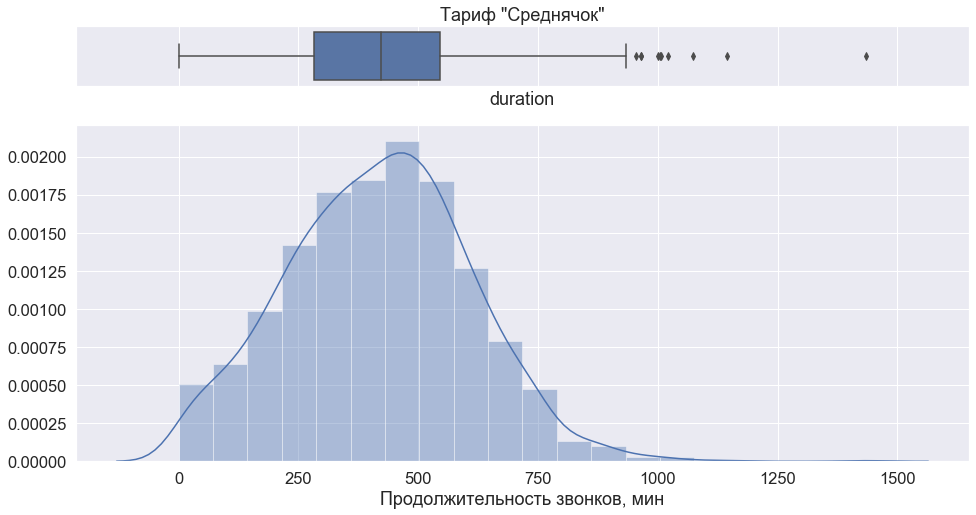

Количество записей с продолжительностью звонков более 500 минут в месяц составляет: 754


In [53]:
df_middle = df_merge_users_data.query('tariff == "middle"')
histogram_boxplot(df_middle['duration'], title='Тариф "Среднячок"', bins = 20, xlabel="Продолжительность звонков, мин")
print('Количество записей с продолжительностью звонков более 500 минут в месяц составляет:', 
      df_middle.query('duration > 500').shape[0])

- Гистограмма продолжительности звонков для тарифа "Среднячок" имеет вид нормального распределения (симметричный набор данных)

Основные данные для столбца: duration - Тариф "Дико-дорог"
count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: duration, dtype: float64

Дисперсия: 100771.22
Стандартное отклонение: 317.44
Среднее значение: 526.62



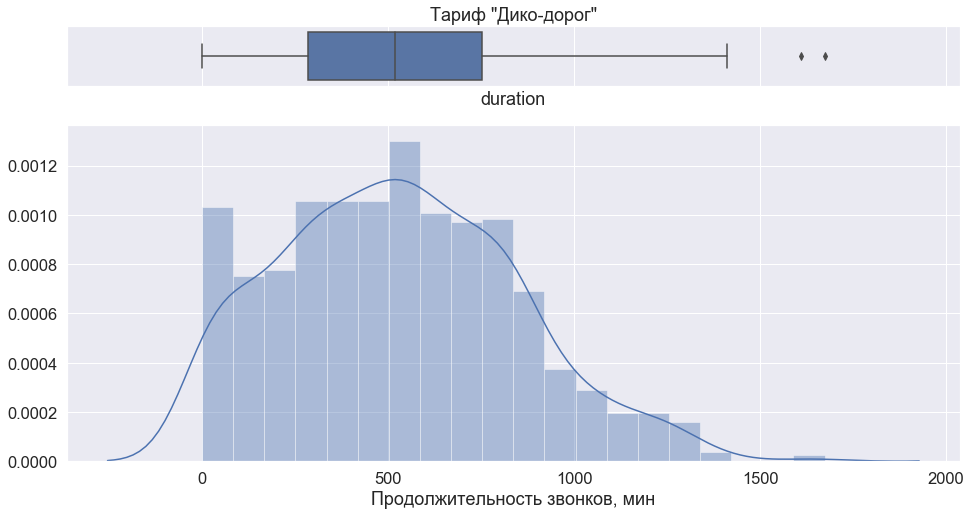

In [54]:
df_wild_expensive = df_merge_users_data.query('tariff == "wild_expensive"')
histogram_boxplot(df_wild_expensive['duration'], title='Тариф "Дико-дорог"', bins = 20, xlabel="Продолжительность звонков, мин")

- Гистограмма продолжительности звонков для тарифа "Дико-дорог" имеет скошенный вправо набор данных

#### 3.2. Анализ количества сообщений пользователей в месяц по каждому тарифу

Основные данные для столбца: messages - Тариф "Среднячок"
count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages, dtype: float64

Дисперсия: 796.46
Стандартное отклонение: 28.22
Среднее значение: 33.38



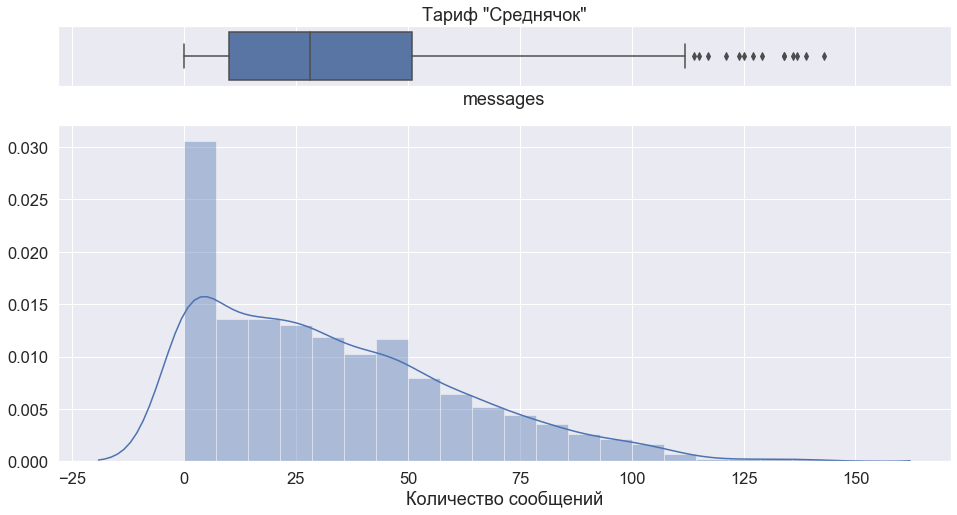

Количество записей с числом сообщений более 50 в месяц составляет: 564


In [55]:
histogram_boxplot(df_middle['messages'], title='Тариф "Среднячок"', bins = 20, xlabel="Количество сообщений")
print('Количество записей с числом сообщений более 50 в месяц составляет:', 
      df_middle.query('messages > 50').shape[0])

- Гистограмма количества сообщений для тарифа "Среднячок" имеет вид распределения Пуассона

Основные данные для столбца: messages - Тариф "Дико-дорог"
count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages, dtype: float64

Дисперсия: 2282.95
Стандартное отклонение: 47.78
Среднее значение: 49.36



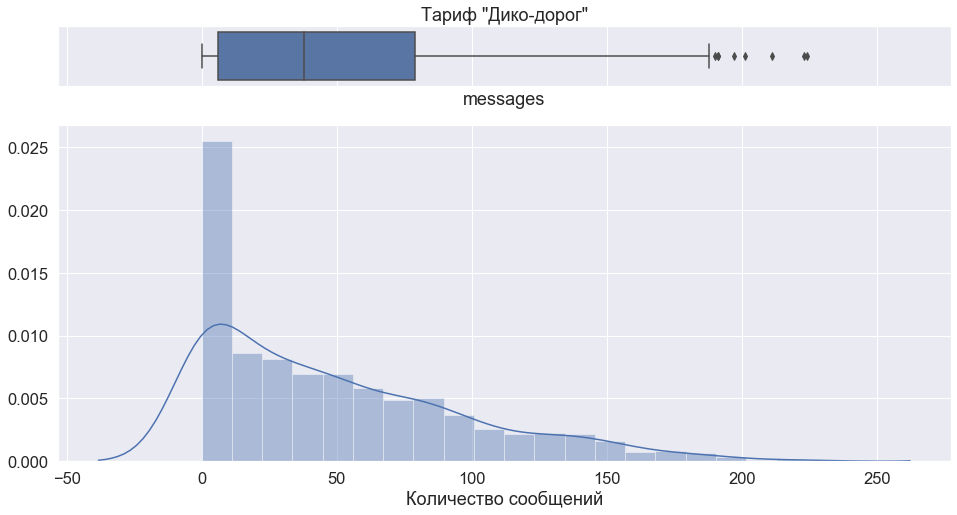

In [56]:
histogram_boxplot(df_wild_expensive['messages'], title='Тариф "Дико-дорог"', bins = 20, xlabel="Количество сообщений")

- Гистограмма количества сообщений для тарифа "Дико-дорог" имеет вид распределения Пуассона

#### 3.3. Анализ объёма интернет-трафика  пользователей в месяц по каждому тарифу

Основные данные для столбца: mb_used - Тариф "Среднячок"
count     2229.000000
mean     16229.188425
std       5877.576978
min          0.000000
25%      12658.000000
50%      16531.000000
75%      20068.000000
max      38610.000000
Name: mb_used, dtype: float64

Дисперсия: 34530412.74
Стандартное отклонение: 5876.26
Среднее значение: 16229.19



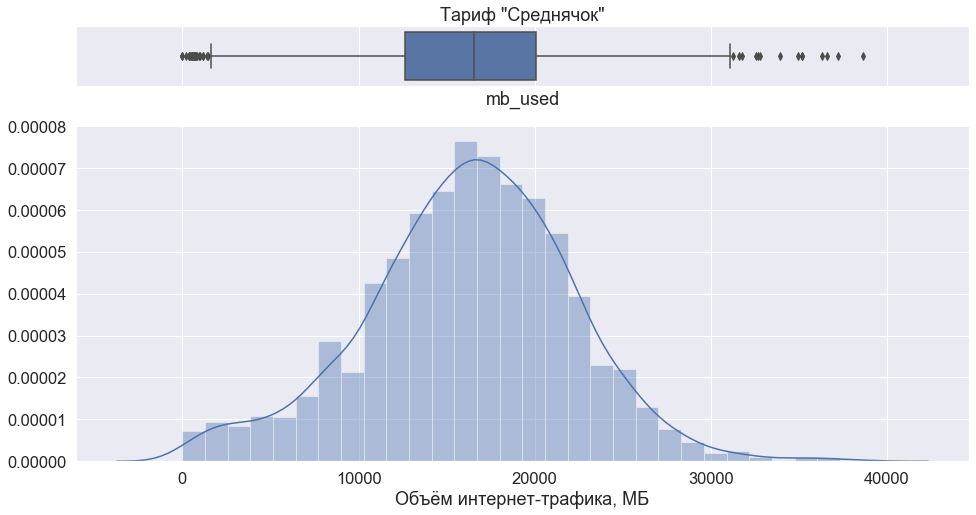

Количество записей с объёмом интернет-трафика более 15 ГБ в месяц составляет: 1309


In [57]:
histogram_boxplot(df_middle['mb_used'], title='Тариф "Среднячок"', bins = 30, xlabel="Объём интернет-трафика, МБ")
print('Количество записей с объёмом интернет-трафика более 15 ГБ в месяц составляет:', 
      df_middle.query('mb_used > 15360').shape[0])

- Гистограмма объёма интернет-трафика для тарифа "Среднячок" имеет вид нормального распределения 

Основные данные для столбца: mb_used - Тариф "Дико-дорог"
count      985.000000
mean     19486.901523
std      10096.317202
min          0.000000
25%      11785.000000
50%      19324.000000
75%      26863.000000
max      49789.000000
Name: mb_used, dtype: float64

Дисперсия: 101832133.11
Стандартное отклонение: 10091.19
Среднее значение: 19486.90



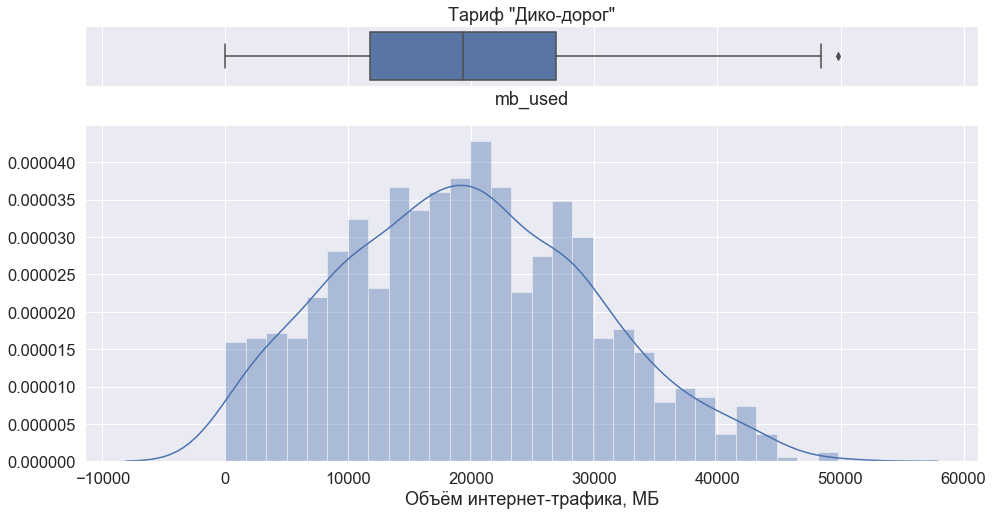

Количество записей с объёмом интернет-трафика более 30 ГБ в месяц составляет: 134


In [58]:
histogram_boxplot(df_wild_expensive['mb_used'], title='Тариф "Дико-дорог"', bins = 30, xlabel="Объём интернет-трафика, МБ")
print('Количество записей с объёмом интернет-трафика более 30 ГБ в месяц составляет:', 
      df_wild_expensive.query('mb_used > 30720').shape[0])

- Гистограмма объёма интернет-трафика для тарифа "Дико-дорог" имеет скошенный вправо набор данных

#### Выводы по шагу 3:
1. Данных по тарифу "Среднячок" в исходной выборке больше чем по тарифу "Дико-дорог" - 69,4% от общего количества, или 2229 и 985 записей соответственно. Это сказалось на том, что построенные гистограммы по тарифу "Среднячок" имеют вид более близкий к нормальному распределению по сравнению с гистограммами по тарифу "Дико-дорог".
1. Средние значения продолжительности звонков по тарифам "Среднячок" и "Дико-дорог" составляют, соответственно: 418 и 527 минут.
1. Пользователи тарифа "Среднячок" в среднем укладываются в предусмотренную тарифом квоту 500 минут: в исходной выборке 33,8% пользователей превысили квоту.
1. Все пользователи тарифа "Дико-дорог" в исходной выборке укладываются в предусмотренную тарифом квоту 3000 минут. Максимальное значение продолжительности звонка составило 1673 минуты.
1. Средние значения количества сообщений по тарифам "Среднячок" и "Дико-дорог" составляют, соответственно: 33 и 49.
1. Пользователи тарифа "Среднячок" в среднем укладываются в предусмотренную тарифом квоту 50 сообщений: в исходной выборке 25,3% пользователей превысили квоту.
1. Все пользователи тарифа "Дико-дорог" в исходной выборке укладываются в предусмотренную тарифом квоту 1000 сообщений. Максимальное значение количества сообщений составило 224.
1. Средние значения объёма интернет-трафика по тарифам "Среднячок" и "Дико-дорог" составляют, соответственно: 16229 и 19487 МБ.
1. Большинство пользователей тарифа "Среднячок" превысили предусмотренную тарифом квоту в 15 ГБ: в исходной выборке 58,7% пользователей превысили квоту.
1. Пользователи тарифа "Дико-дорог" в среднем укладываются в предусмотренную тарифом квоту в 30 ГБ: в исходной выборке 13,6% пользователей превысили квоту.
1. Обобщая информацию можно сделать следующие выводы - не всем пользователям тарифа "Среднячок" хватает минут и сообщений: 33,8% и 25,3% пользователей превысили квоты по минутам и сообщениям соответственно. Пользователям тарифа "Среднячок" совершенно не хватает интернет-трафика: 58,7% пользователей превысили квоту по гигабайтам. Пользователям тарифа "Дико-дорог", напротив, интернет-трафика хватает, но в то же время они никогда не израсходуют доступное им количество минут и сообщений (чистый маркетинг).

### Шаг 4. Проверка гипотез

#### 4.1. Проверка гипотезы "средняя выручка пользователей тарифов «Дико-дорог» и «Среднячок» различается"

- **Н0 (нулевая гипотеза)**: средняя выручка пользователей тарифов «Дико-дорог» и «Среднячок» не различается.
- **Н1 (альтернативная гипотеза)**: средняя выручка пользователей тарифов «Дико-дорог» и «Среднячок» различается.
<br> Нулевая гипотеза сформулирована исходя из того, что проверяться будет гипотеза о **равенстве** средних двух генеральных совокупностей, соответственно, проверять нужно на равенство. Альтернативная гипотеза сформулирована исходя из нулевой гипотезы как противоположная ей и совпадает с формулировкой в задании.

In [59]:
# средние двух генеральных совокупностей равны между собой.

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(df_middle['profit'], df_wild_expensive['profit'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.7240946993530856e-246
Отвергаем нулевую гипотезу


Вывод:
- Средняя выручка пользователей тарифов "Среднячок" и "Дико-дорог" различается - данные гипотезе не противоречат, поэтому гипотезу не отвергаем.

#### 4.2. Проверка гипотезы "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

- **Н0 (нулевая гипотеза)**: средняя выручка пользователей из Москвы и других регионов не различается.
- **Н1 (альтернативная гипотеза)**: средняя выручка пользователей из Москвы и других регионов отличается.
<br> Нулевая гипотеза сформулирована исходя из того, что проверяться будет гипотеза о **равенстве** средних двух генеральных совокупностей, соответственно, проверять нужно на равенство. Альтернативная гипотеза сформулирована исходя из нулевой гипотезы как противоположная ей и совпадает с формулировкой в задании.

In [60]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(df_merge_users_data.query('city == "Москва"')['profit'],
                       df_merge_users_data.query('city != "Москва"')['profit'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5126564657748214
Не получилось отвергнуть нулевую гипотезу


Вывод:
- Результат проверки гипотезы о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов дает основания отвергнуть эту гипотезу, поскольку отличия получились статистически не значимыми.

### Шаг 5. Общий вывод

- Для заказчика более доходным является тариф "Дико-дорог".
- В ходе решения задач проекта была выполнена подготовка данных -  даты приведены к типу данных datetime, вещественные значения float64 приведены к целочисленному типу Int64.
- Для каждого пользователя посчитаны количество сделанных звонков,  израсходованных минут, отправленных сообщений, объём интернет-трафика и выручка по месяцам.
- Получена итоговая таблица с данными всех пользователей и рассчитанными значениями параметров по месяцам, пригодная для анализа.
- Выполнен анализ продолжительности разговоров, количества отправленных сообщений и объёма интернет-трафика пользователей каждого тарифа.
- Выполена проверка гипотезы о различии средней выручки пользователей разных тарифов, а также гипотезы о различии средней выручки пользователей из Москвы и других регионов.